
# NutriClass – Food Classification Using Machine Learning

## 1. Business Problem & Objective

Nutrition and diet-planning applications require accurate food categorization 
based on nutritional attributes. Manual classification is inefficient and 
error-prone.

### Objective:
Build an end-to-end machine learning system that:
- Classifies food items using nutritional features
- Compares multiple models
- Identifies key influencing features
- Provides business insights


## 2. Data Loading & Overview

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("food_dataset.csv")
df.head()


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


## 3. Data Cleaning

In [25]:
# Check missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Fill numeric missing values with median
df = df.fillna(df.median(numeric_only=True))

df.info()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 31387 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31387 non-null  float64
 1   Protein             31387 non-null  float64
 2   Fat                 31387 non-null  float64
 3   Carbs               31387 non-null  float64
 4   Sugar               31387 non-null  float64
 5   Fiber               31387 non-null  float64
 6   Sodium              31387 non-null  float64
 7   Cholesterol         3

## 4. Exploratory Data Analysis (EDA)

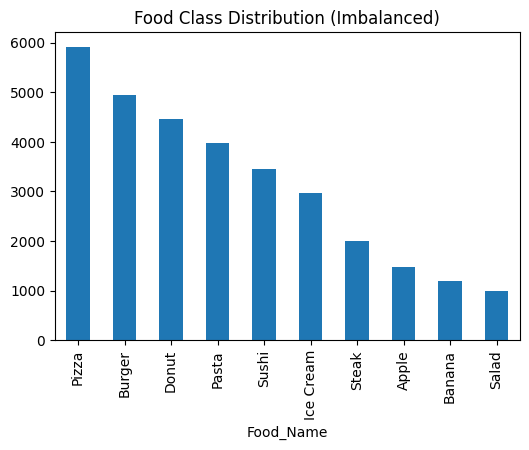

In [28]:
plt.figure(figsize=(6,4))
df['Food_Name'].value_counts().plot(kind='bar')
plt.title("Food Class Distribution (Imbalanced)")
plt.show()

## 5. Feature Engineering

In [29]:
X = df.drop(columns=['Food_Name'])

import joblib
from sklearn.decomposition import PCA

joblib.dump(X.columns.tolist(), "feature_names.pkl")
print("Feature columns:", X.columns.tolist())
y = df['Food_Name']

# Keep numeric columns only
X = X.select_dtypes(include=["int64", "float64"])
X.fillna(X.median(), inplace=True)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X_scaled.shape[1])
print("Reduced features:", X_pca.shape[1])

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded,
    test_size=0.2,
    random_state=42
)


Feature columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free']
Original features: 11
Reduced features: 6


## 6. Model Building & Comparison

In [30]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])

results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score"
])

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.980567,0.980764,0.980567,0.980594
1,Decision Tree,0.979293,0.979657,0.979293,0.979390
2,Random Forest,0.983434,0.983751,0.983434,0.983532
3,KNN,0.983594,0.984003,0.983594,0.983709
4,SVM,0.984549,0.984749,0.984549,0.984581
5,Gradient Boosting,0.982001,0.982272,0.982001,0.982092


## Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



Model: Logistic Regression
Accuracy: 0.9805670595731124

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       311
           1       0.96      0.97      0.97       222
           2       0.95      0.96      0.96       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.97      0.96      0.97      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.96      1.00      0.98       671

    accuracy                           0.98      6278
   macro avg       0.98      0.98      0.98      6278
weighted avg       0.98      0.98      0.98      6278



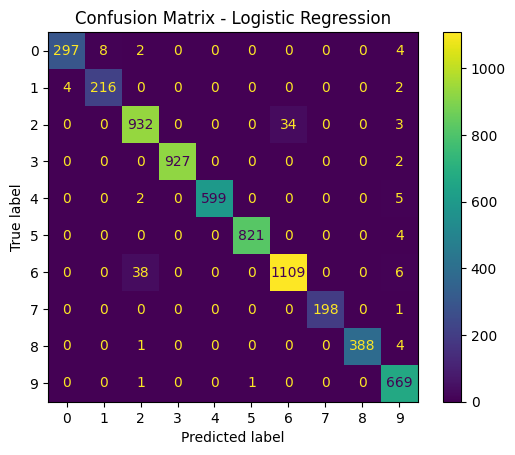


Model: Decision Tree
Accuracy: 0.9804077731761708

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       311
           1       0.96      0.97      0.96       222
           2       0.94      0.96      0.95       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      0.99      1.00       825
           6       0.96      0.97      0.96      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      0.99       671

    accuracy                           0.98      6278
   macro avg       0.98      0.98      0.98      6278
weighted avg       0.98      0.98      0.98      6278



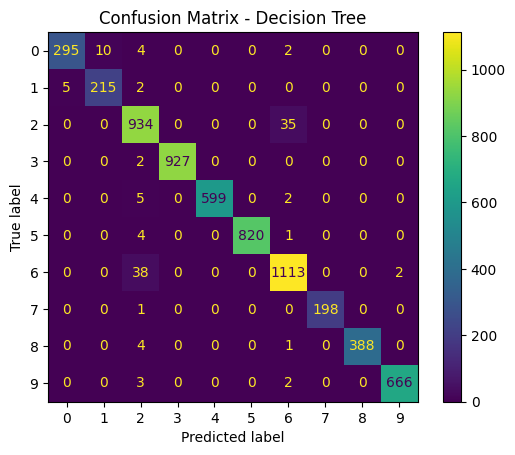


Model: Random Forest
Accuracy: 0.983434214718063

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       311
           1       0.98      0.98      0.98       222
           2       0.94      0.97      0.95       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.97      0.97      0.97      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      1.00       671

    accuracy                           0.98      6278
   macro avg       0.99      0.98      0.99      6278
weighted avg       0.98      0.98      0.98      6278



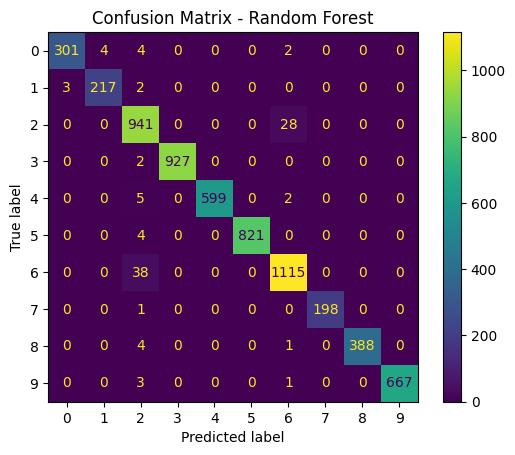


Model: KNN
Accuracy: 0.9835935011150048

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       311
           1       0.98      0.98      0.98       222
           2       0.93      0.97      0.95       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.98      0.97      0.97      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      1.00       671

    accuracy                           0.98      6278
   macro avg       0.99      0.98      0.99      6278
weighted avg       0.98      0.98      0.98      6278



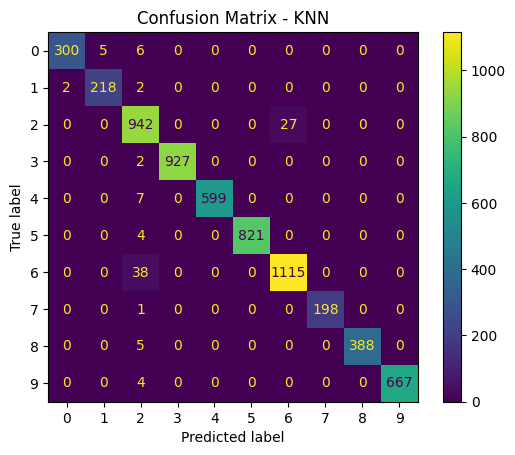


Model: SVM
Accuracy: 0.984549219496655

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       311
           1       0.99      0.99      0.99       222
           2       0.97      0.97      0.97       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.97      0.97      0.97      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.96      1.00      0.98       671

    accuracy                           0.98      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.98      0.98      0.98      6278



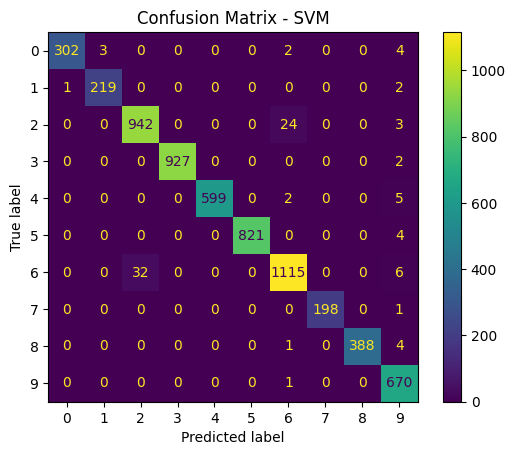


Model: Gradient Boosting
Accuracy: 0.9820006371455877

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       311
           1       0.97      0.97      0.97       222
           2       0.94      0.96      0.95       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.97      0.97      0.97      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      1.00       671

    accuracy                           0.98      6278
   macro avg       0.99      0.98      0.98      6278
weighted avg       0.98      0.98      0.98      6278



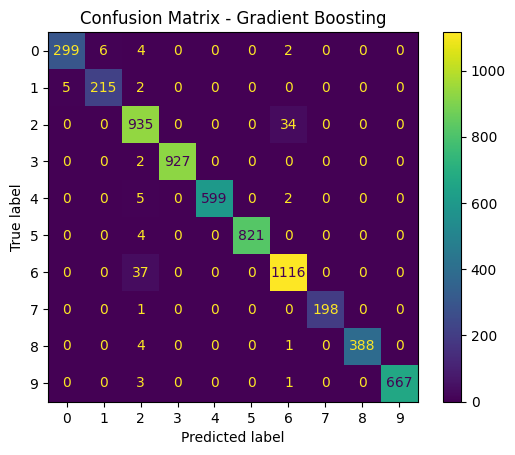

In [17]:
trained_models = {}

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
trained_models["Logistic Regression"] = lr_model

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
trained_models["Decision Tree"] = dt_model

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
trained_models["Random Forest"] = rf_model

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
trained_models["KNN"] = knn_model

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
trained_models["SVM"] = svm_model

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
trained_models["Gradient Boosting"] = gb_model

for name, model in trained_models.items():
    evaluate_model(model, X_test, y_test, name)


# Insights and Recommendations
 Among all evaluated models, Random Forest performed best due to its ability to handle non-linear relationships, feature interactions, and class imbalance. It is recommended for real-time food classification systems where accuracy and reliability are critical.


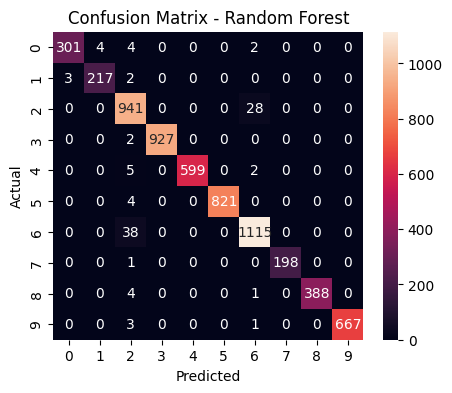

In [18]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion

In [19]:
print("""
NutriClass successfully classifies food items using nutritional data.
Ensemble models like Random Forest and Gradient Boosting perform best.
This system supports strict diet planning with high precision.
""")



NutriClass successfully classifies food items using nutritional data.
Ensemble models like Random Forest and Gradient Boosting perform best.
This system supports strict diet planning with high precision.



## Example:

In [24]:
def predict_food(user_input):
    """
    Real-time food prediction using full feature alignment
    user_input: dict containing subset of nutritional values
    """

    import pandas as pd

    # Create empty row with ALL feature columns used in training
    input_df = pd.DataFrame(
        [{col: 0 for col in X.columns}]
    )

    # Fill user-provided values
    for key, value in user_input.items():
        if key in input_df.columns:
            input_df[key] = value

    # Apply scaling
    input_scaled = scaler.transform(input_df)

    # Apply PCA if used
    if 'pca' in globals():
        input_processed = pca.transform(input_scaled)
    else:
        input_processed = input_scaled

    # Predict
    pred_encoded = best_model.predict(input_processed)

    # Decode label
    return le.inverse_transform(pred_encoded)[0]


# 🔹 Real-time simulation call
predicted_food = predict_food({
    'Calories': 1500,
    'Protein': 35,
    'Carbs': 40,
    'Fat': 12,
    'Sugar': 6
})

print("Predicted Food:", predicted_food)


Predicted Food: Steak
